<a href="https://colab.research.google.com/github/DARoSLab/Adv_robot_dyn_ctrl/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2. Orientation and SE(3)
In this homework, we will investigate
- How to define, use, and visualize orientation matrices, SO(3)
- How to define, use, and visualize the coordinate transformation, SE(3)

In [ ]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
from math import pi
import plotly.graph_objects as go
import mpl_toolkits.mplot3d.axes3d as p3
import scipy

# Q.1 [5 pts] Make a function that converts ZYX Euler angle representation to SO(3)
Complete the fuction returning the orientation matrix, SO(3), given the Euler ZYX angles.

In [ ]:
def ZYX_to_SO3(th_z, th_y, th_x):
  #### Fill your code here
  # make sure you use matrix multiplication not element wise multiplication "*"
  return SO3

Test function for ZYX_to_SO3. Use this code for debugging

In [ ]:
def test_ZYX_to_SO3():
  zyx_test = np.array([[0.3, 0.2, 0.7],
                       [0.7, np.pi, np.pi/2],
                       [np.pi/3, 0, 0]])
  soln = np.array([[[ 0.93629336, -0.10375634,  0.33554338],
                    [ 0.28962948,  0.76850419, -0.57054017],
                    [-0.19866933,  0.63137622,  0.74959627]],
                   [[-7.64842187e-01,  5.42191972e-17,  6.44217687e-01],
                    [-6.44217687e-01,  1.25726990e-16, -7.64842187e-01],
                    [-1.22464680e-16, -1.00000000e+00, -6.12323400e-17]],
                   [[ 0.5      , -0.8660254,  0.       ],
                    [ 0.8660254,  0.5      ,  0.       ],
                    [ 0.       ,  0.       ,  1.       ]]])
  res = []
  for test in zyx_test:
    res.append(ZYX_to_SO3(*test))
  res = np.array(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')



In [ ]:
test_ZYX_to_SO3()

your implementation is correct


# Q.2 [5 pts] Visualize the following frame orientations.
\begin{align}
        (a) ZYX &= (0.3, 0.2, 0.7)\ [rad]\\
        (b) ZYX &= (0.7, 0, \pi/2)\ [rad]\\
        (c) ZYX &= (π/3, 0, 0)\ [rad]
\end{align}

In this problem, you will use the function implemented above to draw the frames with the given Euler angle (a), (b), and (c).




In [ ]:
def draw_vector(ax, origin, end, **kwargs):
  # ax.quiver(origin[0], origin[1], origin[2],  end[0],end[1], end[2], **kwargs)
  ax.quiver(*origin, *(end-origin), **kwargs)

In [ ]:
def draw_axes(ax=None, R=np.eye(3), offset = [0,0,0], draw_global_frame=True, **kwargs):
  """
  R: rotation matrix 3x3
  offset: origin offset 3x1
  """
  offset = np.array(offset)

  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)

  x0 += offset
  y0 += offset
  z0 += offset

  x0[0] += 1
  y0[1] += 1
  z0[2] += 1

  x_e = R[:, 0] + offset #x-axis arrow head
  y_e = R[:, 1] + offset
  z_e = R[:, 2] + offset

  if ax is None:
    print("none")
    fig= plt.figure(figsize=(10,10))
    ax = p3.Axes3D(fig)

  if draw_global_frame:
    draw_vector(ax, offset, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
    draw_vector(ax, offset, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
    draw_vector(ax, offset, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  draw_vector(ax, offset, x_e, lw=8, color = 'r', label='x local')
  draw_vector(ax, offset, y_e, lw=8, color = 'g', label='y local')
  draw_vector(ax, offset, z_e, lw=8, color = 'b', label='z local')

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])

  return ax


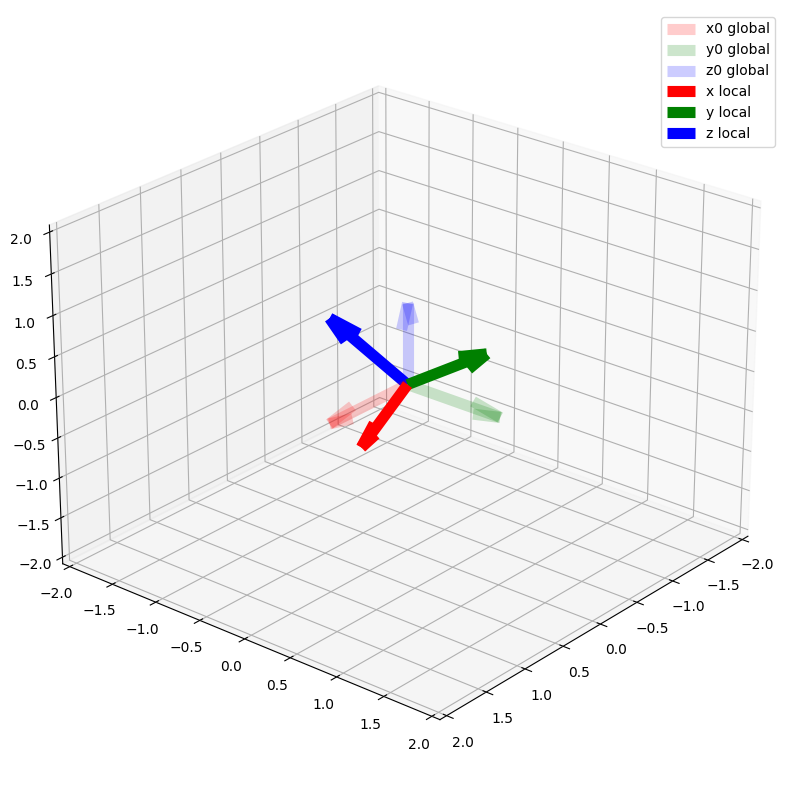

In [ ]:
#(a)
fig_a= plt.figure(figsize=(10,10))
ax_a = fig_a.add_subplot(projection='3d')

#### Fill your code: Make a rotation matrix R_a
ax_a = draw_axes(ax=ax_a, R=R_a)

ax_a.legend()
ax_a.view_init(25, 40)
fig_a.show()

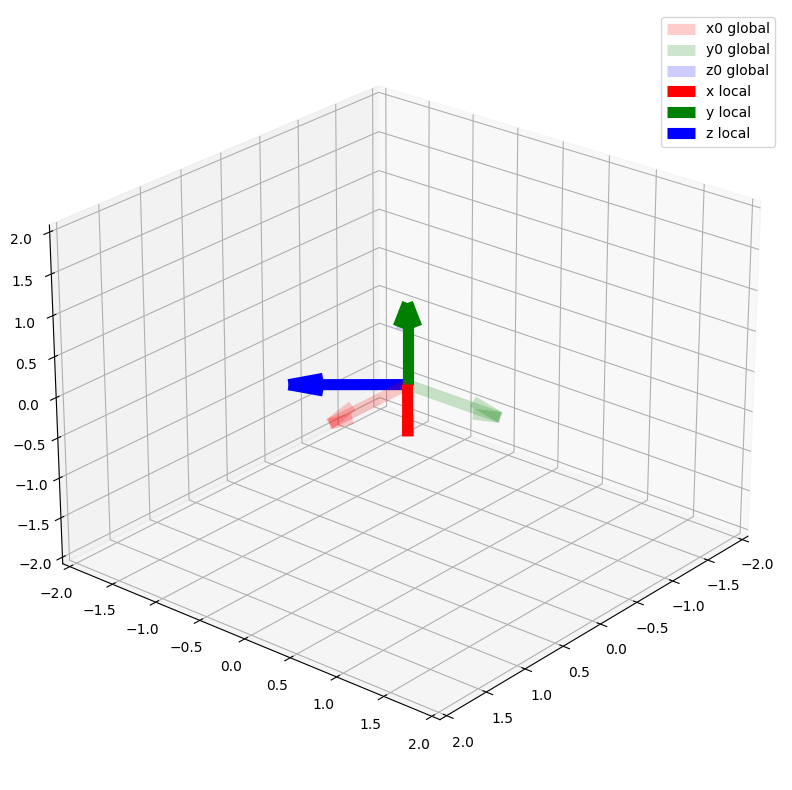

In [ ]:
#(b)
#### Fill your code for R_b

fig_b= plt.figure(figsize=(10,10))
# ax_b= p3.Axes3D(fig_b)
ax_b = fig_b.add_subplot(projection='3d')

ax_b = draw_axes(ax_b, R=R_b)
ax_b.view_init(25, 40)
ax_b.legend()

fig_b.show()

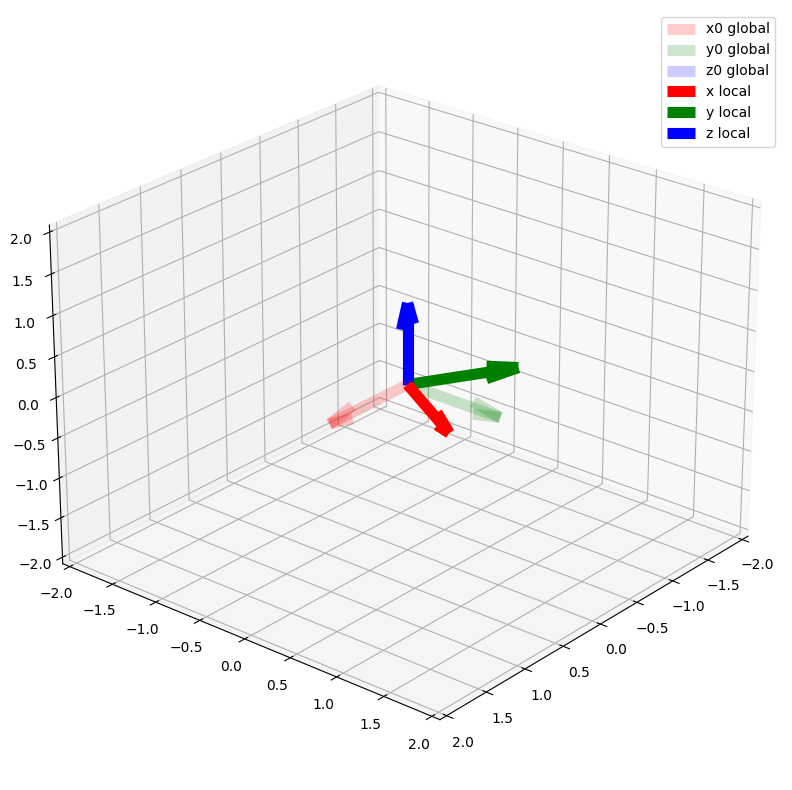

In [ ]:
#(c)
#### Fill your code for R_c

fig_c= plt.figure(figsize=(10,10))
# ax_c = p3.Axes3D(fig_c)
ax_c = fig_c.add_subplot(projection='3d')

ax_c = draw_axes(ax=ax_c, R=R_c)
ax_c.legend()
ax_c.view_init(25, 40)

fig_c.show()

# Q.3 [20 pts] Make a function that converts ZYX Euler angle representation to Quaternion representation

Complete the implementation of the function, ZYX_to_Quaternion, which takes euler angles as inputs and returns quaternion coincide with the euler angles.

In [ ]:
def ZYX_to_Quaternion(th_z, th_y, th_x):
  quaternion = np.zeros(4)
  #### Fill your code here
  return quaternion

def vee(R):
  return np.array([R[2,1], R[0, 2], R[1, 0]])

def SO3_to_so3(R):
  omega, theta = None, 0
  if np.allclose(R, np.eye(3)): # if R = identity
    pass
  elif np.abs(np.trace(R)+1)<1e-5: # if theta = pi
    theta = np.pi
    r13 = R[0,2]
    r23 = R[1,2]
    r33 = R[2,2]
    omega = np.array([r13,r23, 1+r33])
    omega *= (1./np.sqrt(2*(1+r33)))
  else: # Other normal cases
    #### Fill your code to compute so(3)
    #You can use the vee function above when finding omega.
  return omega, theta

In [ ]:
def test_ZYX_to_Quaternion():
  zyx_test = np.array([[0.3, 0.2, 0.7],
                       [0.7, np.pi, np.pi/2],
                       [np.pi/3, 0, 0]])
  # print(zyx_test)
  soln = np.array([[ 0.92929998,  0.32333918,  0.14371374,  0.10582853],
                  [ 0.24246536, -0.24246536,  0.66423682, -0.66423682],
                  [ 0.8660254,   0.,          0.,          0.5       ]])
  res = []
  for test in zyx_test:
    res.append(ZYX_to_Quaternion(*test))
  res = np.array(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')

In [ ]:
test_ZYX_to_Quaternion()

your implementation is correct


# Q.4 [15 pts] Rotate the following vectors with the rotation matrices found in Q.1.
\begin{align}
%p_1&=(0.5, 0.3, 0.1)\\
p&=(1, 0.1, 0.4)\\
\end{align}
Visualize it and provide the coordinate of the rotated vector in both local and global coordinates.

In [ ]:
p = np.array([1, 0.4, 0.7])

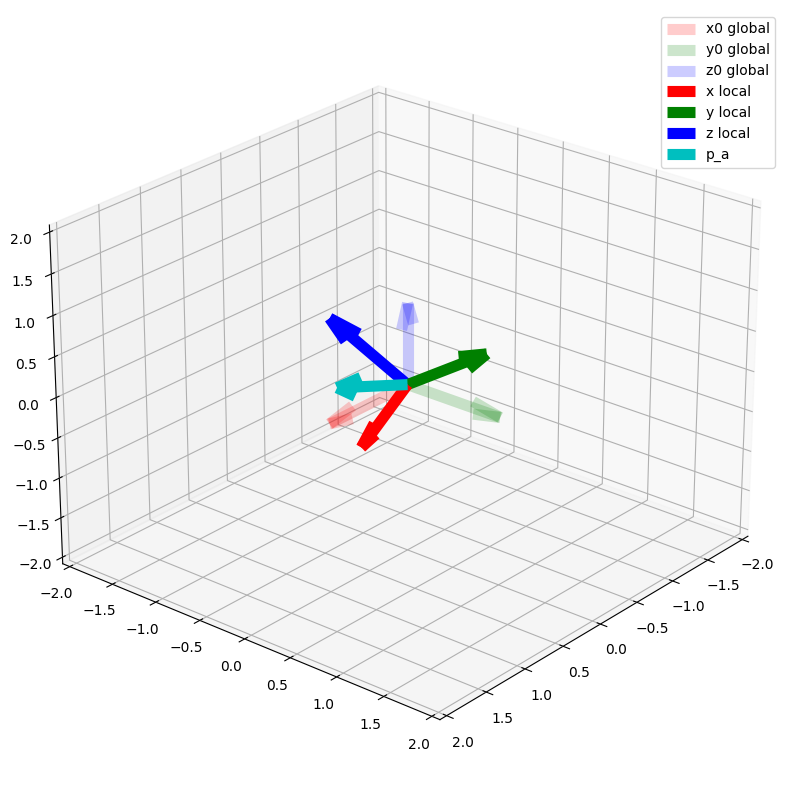

In [ ]:
#### Fill your code: Compute the vector (p_a) rotated by R_a


fig_q4 = plt.figure(figsize=(10,10))
ax_q4 = fig_q4.add_subplot(projection='3d')

ax_q4 = draw_axes(ax=ax_q4, R=R_a)
draw_vector(ax_q4, [0, 0, 0], p_a, color='c', label='p_a', lw=8)
ax_q4.legend()
ax_q4.view_init(25, 40)

fig_q4.show()

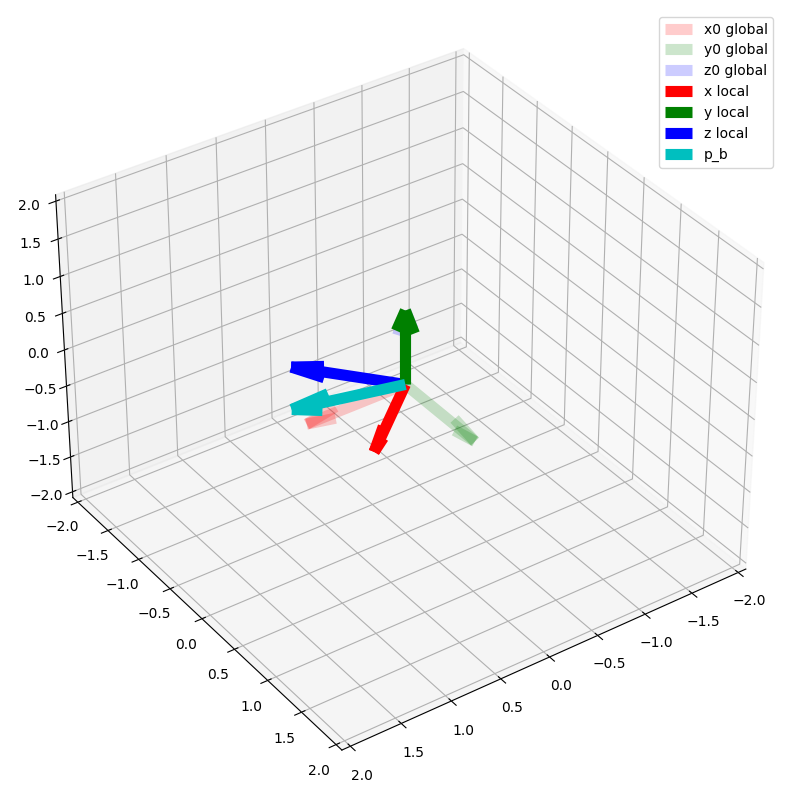

In [ ]:
#### Fill your code: Compute the vector (p_b) rotated by R_b

fig_q4b= plt.figure(figsize=(10,10))
ax_q4b= fig_q4b.add_subplot(projection='3d')
ax_q4b = draw_axes(ax=ax_q4b, R=R_b)
draw_vector(ax_q4b, [0, 0, 0], p_b, color='c', label='p_b', lw=8)
ax_q4b.legend()
ax_q4b.view_init(35, 55)


fig_q4b.show()

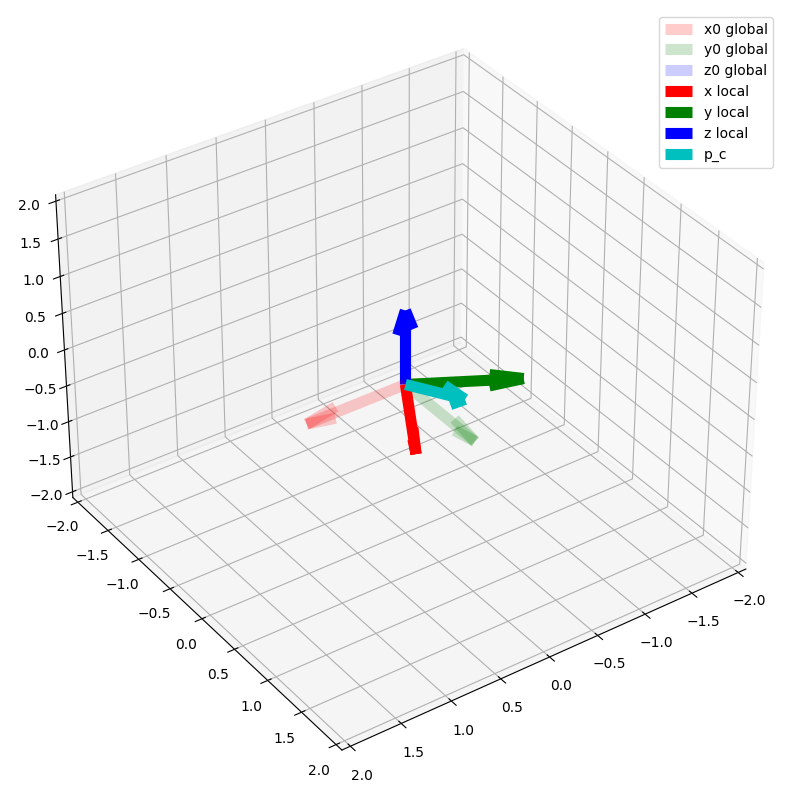

In [ ]:
#### Fill your code: Compute the vector (p_c) rotated by R_c

fig_q4c= plt.figure(figsize=(10,10))
ax_q4c= fig_q4c.add_subplot(projection='3d')
ax_q4c = draw_axes(ax=ax_q4c, R=R_c)
draw_vector(ax_q4c, [0, 0, 0], p_c, color='c', label='p_c', lw=8)
ax_q4c.legend()
ax_q4c.view_init(35, 55)

fig_c.show()

**What is the values of rotated vectors in terms of the local or global frames? Explain why the values read in the local frame do not change. Put your answers in the text box below.**

(Your answer)

# Q.5 (a) [10 pts] Integrate constant anglar velocity of $ω=[0, 0, 10]\ [rad/s]$ for 1.5 sec starting from the following orientation:
\begin{equation}R = \begin{bmatrix}
      0 &1 &0 \\
      -1& 0& 0 \\
      0& 0 & 1
      \end{bmatrix}.
\end{equation}
<!-- $e^{[\omega t]} R$ and $Re^{[\omega t]}$. -->


In [ ]:
# Help function: 3-dim vector to skew symmetry matrix
def hat(a):
  return np.array([[0, -a[2], a[1]],
                   [a[2], 0, -a[0]],
                   [-a[1], a[0], 0]])

In [ ]:
omega = np.array([0, 10, 0])
N_t = 30
delta_t = 0.015
R = np.array([[0, 1, 0],
              [-1, 0, 0],
              [0, 0, 1]])


R_implicit = np.zeros((N_t, 3, 3))
R_explicit = np.zeros((N_t, 3, 3))

# complete the code that save list of orientation matrices
R_implicit[0, :, :] = R
R_explicit[0, :, :] = R

omega_t = omega*delta_t

for i in range(N_t-1):
  omega_t_hat = hat(omega_t)
  exp_omega_t = scipy.linalg.expm(omega_t_hat)

  R_implicit[i+1, :, :] =  #### Fill your code
  R_explicit[i+1, :, :] =  #### Fill your code

# Q.5 (b) [10 pts] Animate and explain the difference of explicit and implicit integration


In [ ]:
def draw_axes_mp(Rs, **kwargs):
  """
  Rs: a list of rotation matrices
  """
  fig= plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')
  origin = np.zeros(3)

  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)

  x0[0] += 1
  y0[1] += 1
  z0[2] += 1

  draw_vector(ax, origin, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
  draw_vector(ax, origin, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
  draw_vector(ax, origin, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r', label='x')
  y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g', label='y')
  z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b', label='z')

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):
    #### complete this function that updates x_, y_, and z_axis with the values in Rs
    #Use set_data and set_3d_properties function

    return x_axis, y_axis, z_axis,

  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=1000, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=1000, blit=True)
  return anim


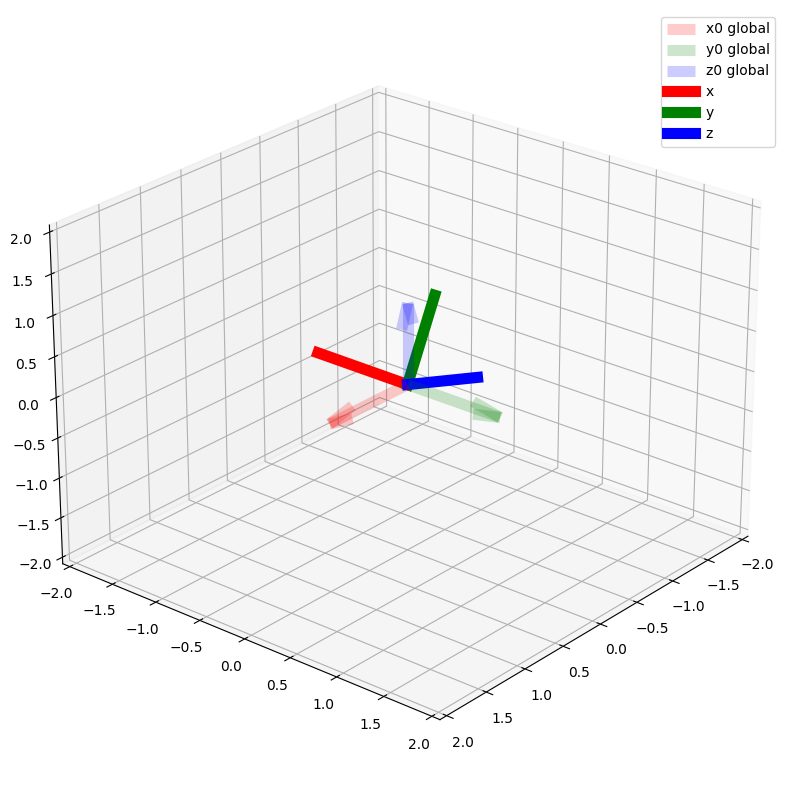

In [ ]:
anim = draw_axes_mp(R_explicit, frames = N_t)
HTML(anim.to_html5_video())

**Animate implicit rotation**

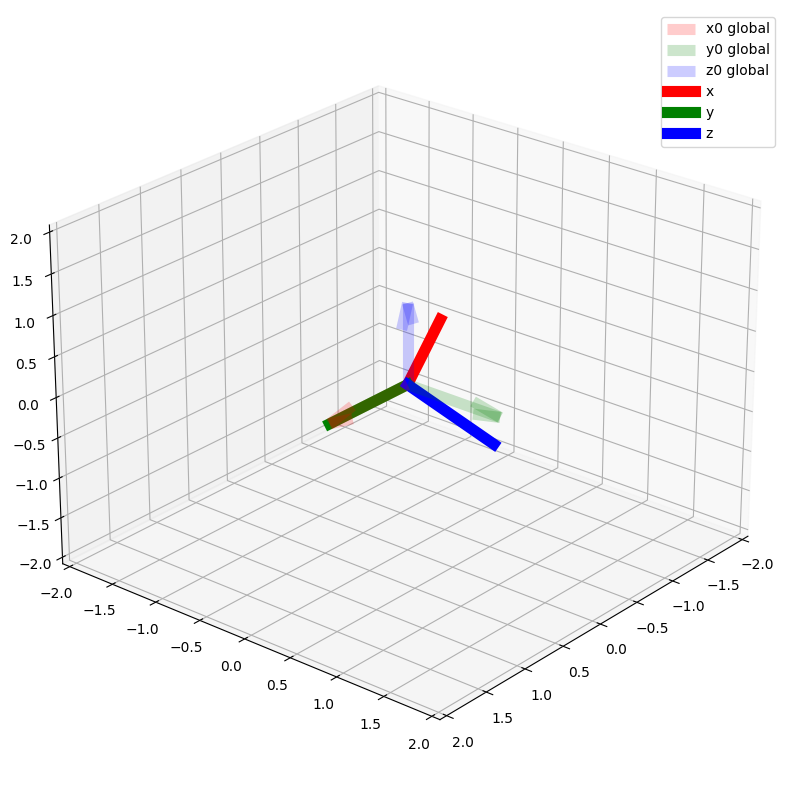

In [ ]:
anim = draw_axes_mp(R_implicit, frames=N_t)
HTML(anim.to_html5_video())

**Explain the difference of implicit and explicit rotation based on the integration results**

(Your Answer)

#Q.6 [5 pts] Make a function that converts position and ZYX orientation representation to SE(3).

In [ ]:
def POS_ZYX_to_SE3(x, y, z, th_z, th_y, th_x):
  #### Fill your code
  return SE3

In [ ]:
def test_POS_ZYX_to_SE3():
  zyx_test = np.array([[0.3, 0.2, 0.7, 0.5, 0.2, 1.2],
                       [0.5, 0.6, 1.8, 0.7, np.pi, np.pi/2],
                       [0.1, 0.0, 2, np.pi/3, 0, 0]])
  soln = np.array([[[ 8.60089338e-01, -1.12237211e-02,  5.10019959e-01,  3.00000000e-01],
                    [ 4.69868947e-01,  4.06772914e-01, -7.83427705e-01,  2.00000000e-01],
                    [-1.98669331e-01,  9.13460357e-01,  3.55134724e-01,  7.00000000e-01],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
                  [[-7.64842187e-01,  5.42191972e-17,  6.44217687e-01,  5.00000000e-01],
                    [-6.44217687e-01,  1.25726990e-16, -7.64842187e-01,  6.00000000e-01],
                    [-1.22464680e-16, -1.00000000e+00, -6.12323400e-17,  1.80000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
                  [[ 5.00000000e-01, -8.66025404e-01,  0.00000000e+00,  1.00000000e-01],
                    [ 8.66025404e-01,  5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  2.00000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]])
  res = []
  for test in zyx_test:
    res.append(POS_ZYX_to_SE3(*test))
  res = np.array(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')

In [ ]:
test_POS_ZYX_to_SE3()

your implementation is correct


#Q.7 [20 pts] Using the following relationships between frames, find the SE(3) that corresponds to $frame{\{i\}}→{\{0\}} \ ∀\  i \in \{0, 1, 2, 3\}$ and draw them on the same plot.

> > * frame${\{0\}}: position=(0, 0, 0),\  ZYX=(0, 0, 0) $
> > * frame${\{0\}}→{\{1\}}: position=(0.4, 0.0, 0.4),\  ZYX=(0, \theta_1, 0) $
> > * frame${\{1\}}→{\{2\}}: position=(0.7, 0.0, 0.8),\  ZYX=(0, \theta_2, 0) $
> > * frame${\{2\}}→{\{3\}}: position=(1.0, 0.0, 0.4),\  ZYX=(0, \theta_3, 0) $

For this question use $\theta_1=\theta_2=\theta_3=0$

In [1]:
def draw_SE3(ax, T):
  ax = draw_axes(ax, R=T[:3, :3], offset = T[:-1, 3], draw_global_frame=False)
  return ax

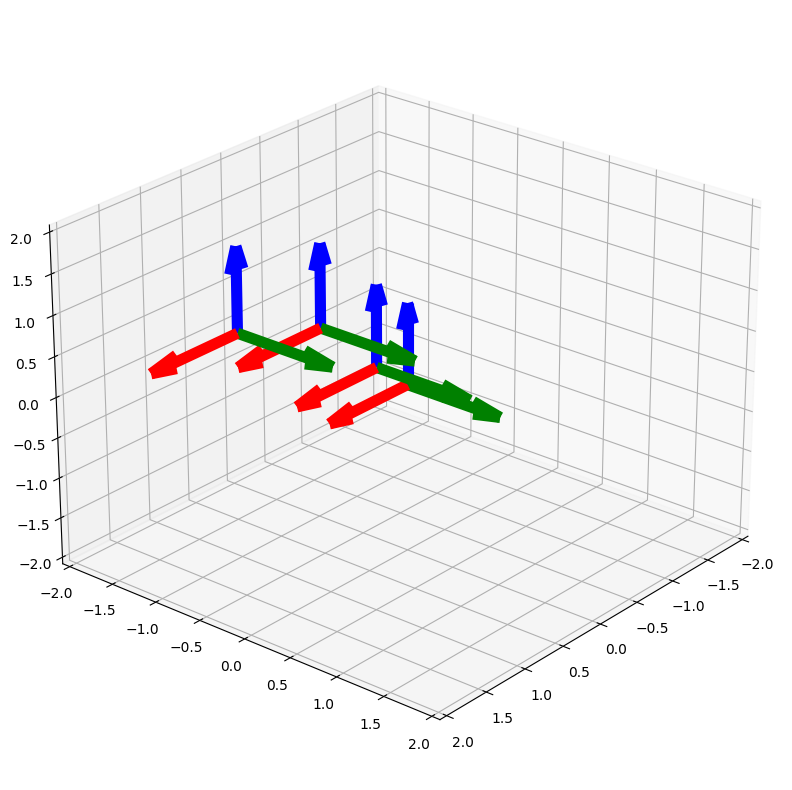

In [ ]:
T0 = POS_ZYX_to_SE3(-0.0, 0.0, 0.0, 0., 0.0, 0.0)

#### Fill your code: Complete all SE(3)
T0_1 =
T1_2 =
T2_3 =
T0_3 =


fig_T1= plt.figure(figsize=(10,10))
ax = fig_T1.add_subplot(projection='3d')
ax.view_init(25, 40)

ax = draw_SE3(ax, T0)
ax = draw_SE3(ax, T0_1)
ax = draw_SE3(ax, T0_2)
ax = draw_SE3(ax, T0_3)

# Q.8 [10 pts] In this question, the pitch angles in Q.7 change over time using the following rule
\begin{align}
\theta_1(t) &= sin(ωt)\\
\theta_2(t) &= sin(ωt + 0.3)\\
\theta_3(t) &= 0.
\end{align}
where $ω = 5\ [rad/s]$. Animate the frames $t \in [0, 1.5]$ sec.

In [ ]:
N = 50
omega = 5
t = np.linspace(0, 1.5, N)
th_1_hist  = np.sin(omega*t)
th_2_hist  = np.sin(omega*t + 0.3)
th_3_hist  = 0*np.sin(omega*t)
T_hist = np.zeros((N, 4, 4, 4))

#### complete the code that saves history of the frame change
for i in range(N):

In [ ]:
def animate_frames(T_hist, **kwargs):
  """
  T_hist: a list of SE(3) matrices (N, n_frames, 4, 4)
  """
  fig= plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')

  N, n_frames, _, _ = T_hist.shape
  x_axis_list = []
  y_axis_list = []
  z_axis_list = []

  for i in range(n_frames):
    x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r')
    y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g')
    z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b')
    x_axis_list.append(x_axis)
    y_axis_list.append(y_axis)
    z_axis_list.append(z_axis)

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):
    for i in range(n_frames):
      T = T_hist[k, i, :, :]
      R=T[:3, :3]
      offset = T[:-1, 3]
      x_e = R[:, 0] + offset
      y_e = R[:, 1] + offset
      z_e = R[:, 2] + offset

      x_axis_list[i].set_data([offset[0], x_e[0]], [offset[1], x_e[1]])
      x_axis_list[i].set_3d_properties([offset[2], x_e[2]])
      y_axis_list[i].set_data([offset[0], y_e[0]], [offset[1], y_e[1]])
      y_axis_list[i].set_3d_properties([offset[2], y_e[2]])
      z_axis_list[i].set_data([offset[0], z_e[0]], [offset[1], z_e[1]])
      z_axis_list[i].set_3d_properties([offset[2], z_e[2]])
    return x_axis_list + y_axis_list + z_axis_list

  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=1000, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=1000, blit=True)
  return anim


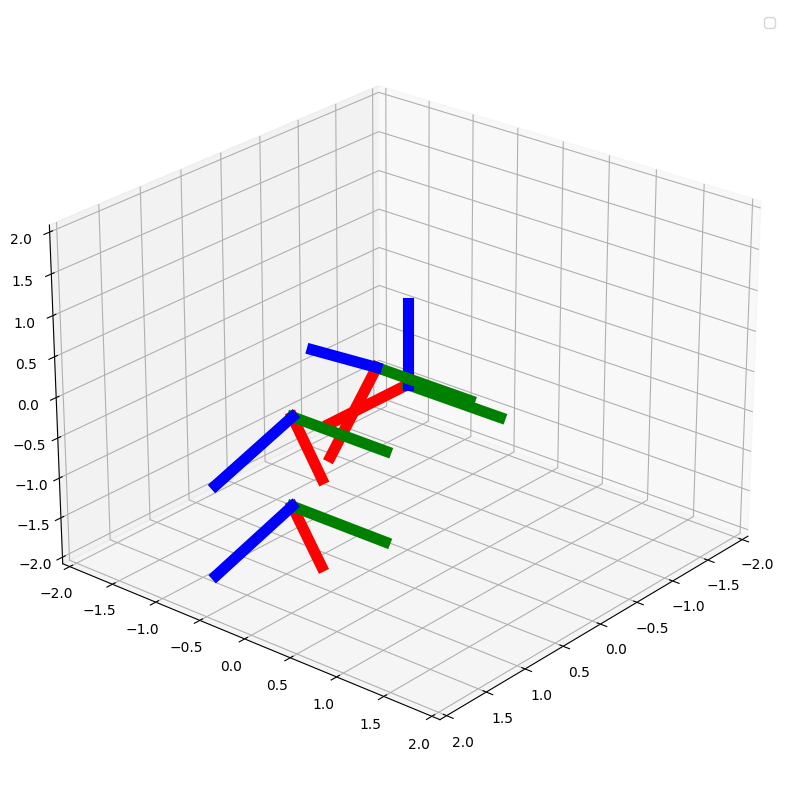

In [ ]:
anim = animate_frames(T_hist, frames=N)
HTML(anim.to_html5_video())